Link for the presentation : https://drive.google.com/file/d/1OIC5JN99JDox68XTgFvdFMg_mxubZ5OF/view?usp=sharing

# Customer Satisfaction 😀


---

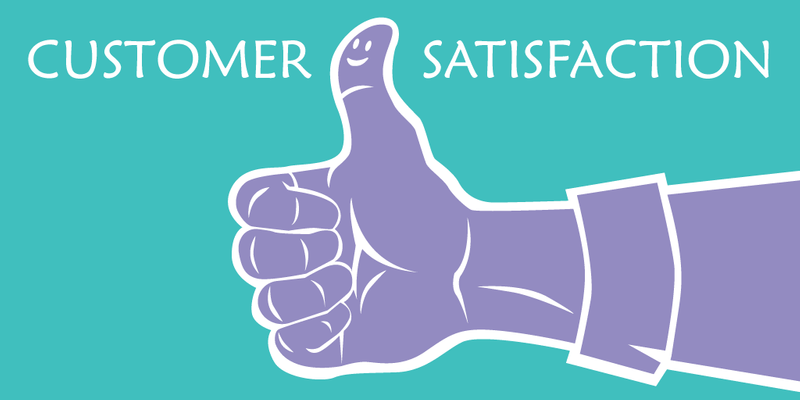

TEAM DATAFIED - Prabhakaran, Rohan, Suvarna, Abhishek
### "Your most unhappy customers are your greatest source of learning." -- Bill Gates

In any business, customer satisfaction is the major key to success. So, keeping tracking of the satisfaction of the customers is really a frontline task of any business. 

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the data
train_data = pd.read_csv('/content/sample_data/train.csv')
test_data = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
train_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
print('Train data shape: ',train_data.shape)
print('Test data shape: ',test_data.shape)

Train data shape:  (76020, 371)
Test data shape:  (75818, 370)


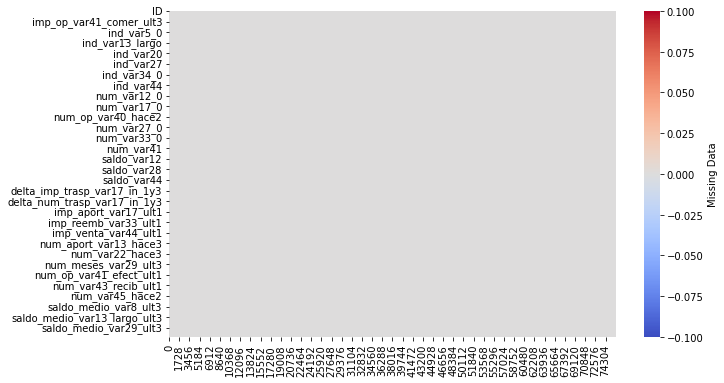

In [ ]:
# Checking the NA values
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isna().transpose(),
            cmap="coolwarm",
            cbar_kws={'label': 'Missing Data'})

In [ ]:
print('No. of NaN values in train data: ', train_data.isna().sum().sum())
print('No. of NaN values in test data: ', test_data.isna().sum().sum())

No. of NaN values in train data:  0
No. of NaN values in test data:  0


In [ ]:
# Let's look for any categorical columns
cat_cols = [col for col in train_data.columns if type(col) == object]
print('No. of categorical columns: ',len(cat_cols))

No. of categorical columns:  0


Since there are no categorical columns, there is no need for encoding

Text(0.5, 1.0, 'Distribution of the classes')

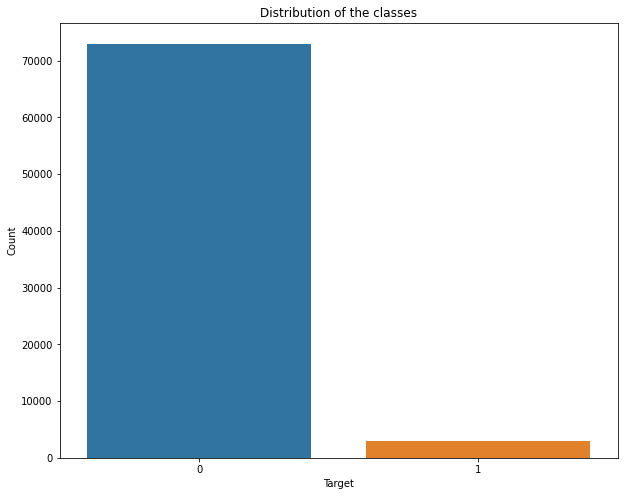

In [ ]:
# Let's check for the class balance
plt.figure(figsize = (10,8))
sns.countplot(x = train_data['TARGET'],)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of the classes')

As we can see there is a huge imbalance between the target classes, we need to do resampling before training the model.

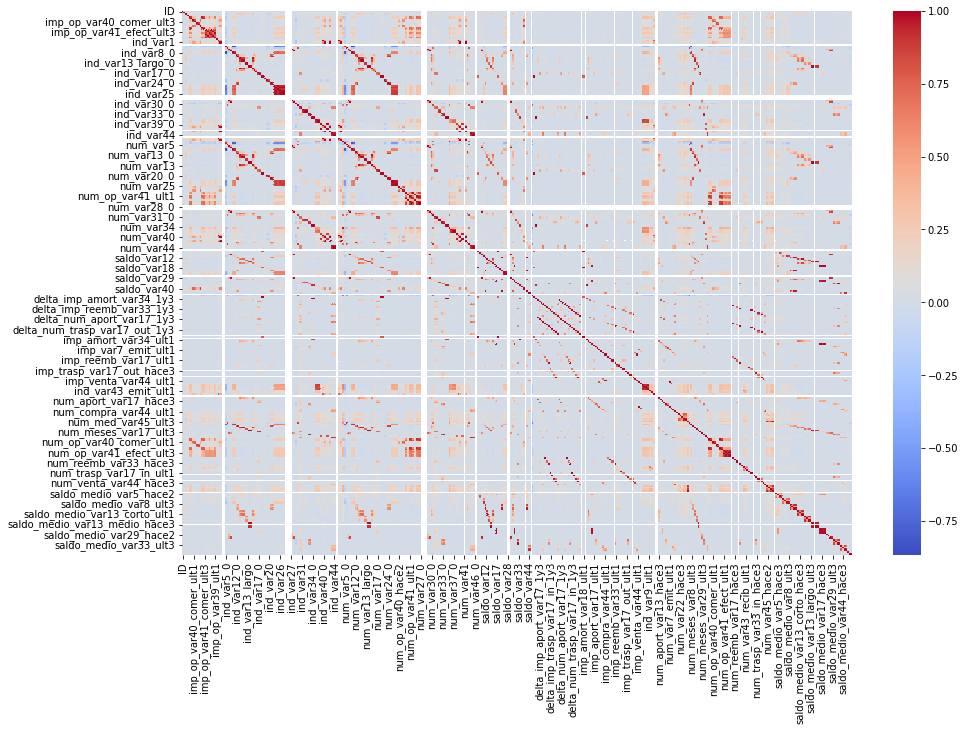

In [ ]:
# Plotting the pearson correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), cmap='coolwarm')

In [ ]:
# Assigning the predictor and response variable
X = train_data.drop(['TARGET', 'ID'], axis=1)
y = train_data['TARGET']

There are around 370 features, in order to reduce the features, we'll use random forest regressor to get the important features





In [ ]:
# Using a random forest model for feature selection
rf_feature_model = RandomForestRegressor(max_depth=10,random_state=0)
rf_feature_model.fit(X,y)

RandomForestRegressor(max_depth=10, random_state=0)

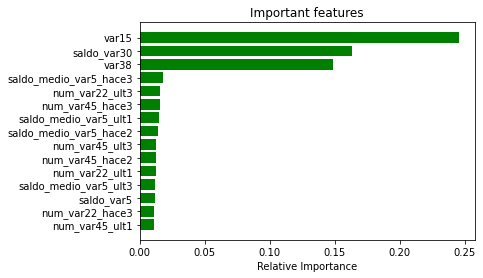

In [ ]:
# Getting and plotting the important features
features = X.columns
importances = rf_feature_model.feature_importances_
ranks = np.argsort(importances)[-15:]  
plt.title('Important features')
plt.barh(range(len(ranks)), importances[ranks], color='g', align='center')
plt.yticks(range(len(ranks)), [features[i] for i in ranks])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Top 50 important features are considered here
ranks = np.argsort(importances)[-100:]  
important_features = features[ranks]
# Redeclaring the predictors for train and test data 
X_feat_sel = train_data[important_features] 
test_data_feat_sel = test_data[important_features]

Text(0.5, 1.0, 'Distribution of the classes after resampling')

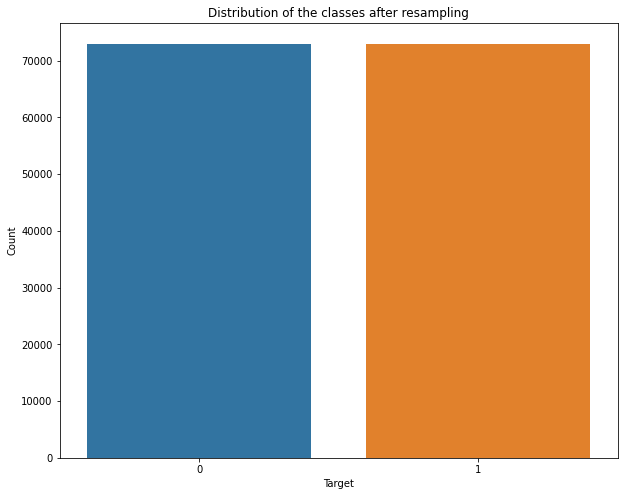

In [ ]:
# In order to solve the class imbalance issue, oversampling is done
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_feat_sel,y)

plt.figure(figsize = (10,8))
sns.countplot(x = y_res)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of the classes after resampling')

In [ ]:
# Splitting the data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, random_state=0, test_size=0.2)

In [ ]:
# Scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
test_data_scaled = scaler.transform(test_data_feat_sel)

In [ ]:
# Declaring the base model for classification
log_reg = LogisticRegression(max_iter=1000)
cv_score_log = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='f1')
print('F1_score of the logistic regression model: {:.2f}'.format(cv_score_log.mean()))

F1_score of the logistic regression model: 0.80


In [ ]:
# Trying out the ensemble model
rf = RandomForestClassifier()
cv_score_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1')
print('F1_score of the random forest model: {:.2f}'.format(cv_score_rf.mean()))

F1_score of the random forest model: 0.94


In [ ]:
# Trying out the ensemble boosting model
xgb = XGBClassifier()
cv_score_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1')
print('F1_score of the XGBoost model: {:.2f}'.format(cv_score_xgb.mean()))

F1_score of the XGBoost model: 0.90


*Among* the three models, Random forest model is giving a higher f1_score. So, we can work on to fine tune it

In [ ]:
# Declaring the hyperparameters as a dicitonary for tuning
params = {
    'n_estimators' : [50,100,150,200,250],
    'max_depth' : [2,5,10,20],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

In [ ]:
model = RandomForestClassifier(random_state=0)
searchcv = RandomizedSearchCV(model, param_distributions = params, cv = 5, scoring='f1')
searchcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   scoring='f1')

In [ ]:
print('Best estimator : ',searchcv.best_estimator_)
print('Best score : {:.3f}'.format(searchcv.best_score_))
print('Best parameters : ',searchcv.best_params_)

Best estimator :  RandomForestClassifier(max_depth=20, n_estimators=250)
Best score : 0.925
Best parameters :  {'n_estimators': 250, 'max_depth': 20, 'criterion': 'gini'}


In [ ]:
# Picking the best estimator and checking its performance on the validation set
best_estimator = searchcv.best_estimator_
predictions = best_estimator.predict(X_val)
f1_score = f1_score(y_val,predictions)
roc_score = roc_auc_score(y_val, predictions)

print('F1_Score on the validation set: {:.2f}'.format(f1_score))
print('ROC AUC score on the validation set: {:.2f}'.format(roc_score))

F1_Score on the validation set: 0.84
ROC AUC score on the validation set: 0.82


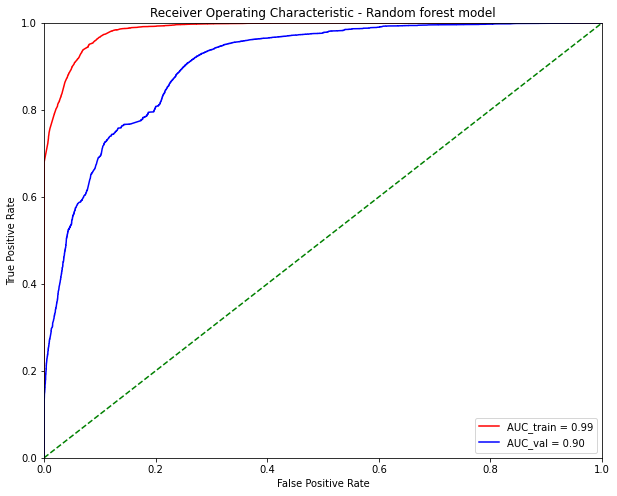

In [ ]:
# Finding the tpr and fpr and plot the roc curve
probs_val = best_estimator.predict_proba(X_val)
probs_train = best_estimator.predict_proba(X_train)
preds_val = probs_val[:,1]
preds_train = probs_train[:,1]
fpr_val, tpr_val, threshold_val = roc_curve(y_val, preds_val)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, preds_train)
roc_auc_val = auc(fpr_val, tpr_val)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(10,8))
plt.plot(fpr_train, tpr_train, 'r', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.plot(fpr_val, tpr_val, 'b', label = 'AUC_val = %0.2f' % roc_auc_val)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic - Random forest model')
plt.show()

### Conclusion and future work:

Out of Random forest, logistic regression and XGBoost, Random forest performed better. Even that one performs little bit lower on the validation set. It can be seen from the ROC chart depicted here. So, the future work is to make the model perform well on the validation set also. This might also be due to the imbalanced data, since the data is balanced synthetically.